# 概率统计

SymPy也支持概率统计的符号运算.它需要导入子模块`sympy.stats`

In [1]:
from sympy import init_printing
init_printing(use_unicode=True)

## 分布的类型


统计模块建立在分布之上,SymPy支持的分布有:

> 有限分布

分布|对应类
---|---
均匀分布|DiscreteUniform
正态分布|Normal
指数分布|Exponential
投硬币概率分布|Coin
二项分布|Binomial
等概分布|Die
伯努利分布|Bernoulli
超几何分布|Hypergeometric
Rademacher分布|Rademacher


> 离散分布

分布|对应类
---|---
几何分布|Geometric
泊松分布|Poisson
对数分布|Logarithmic
负二项分布|NegativeBinomial
Yule-Simon分布|YuleSimon
Zeta分布|Zeta

> 连续分布

分布|对应类
---|---
反正弦分布|Arcsin
Benini分布|Benini
Beta分布|Beta
Beta素数分布|BetaPrime
Cauchy分布|Cauchy
卡分布|Chi
去中心卡分布|ChiNoncentral
卡方分布|ChiSquared
Dagum分布|Dagum
Erlang分布|Erlang
指数分布|Exponential
F分布|FDistribution
费舍尔Z分布|FisherZ
Frechet分布|Frechet
Gamma分布|Gamma
逆Gamma分布|GammaInverse
Kumaraswamy分布|Kumaraswamy
拉普拉斯分布|Laplace
Logistic分布|Logistic
对数正态分布|LogNormal
Maxwell分布|Maxwell
Nakagami分布|Nakagami
正态分布|Normal
Pareto分布|Pareto
二次U分布|QuadraticU
升余弦分布|RaisedCosine
Rayleigh分布|Rayleigh
T分布|StudentT
三角分布|Triangular
均匀分布|Uniform
Irwin-Hall分布|UniformSum
VonMises分布|VonMises
Weibull分布|Weibull
维格纳半圆分布|WignerSemicircle


使用这些这些分布类可以实例化出对应分布的随机变量

In [2]:
from sympy.stats import Die,Normal

In [3]:
X, Y = Die('X', 6), Die('Y', 6) # 等概分布
Z = Normal('Z', 0, 1) # 正态分布

In [4]:
X

In [5]:
Y

In [6]:
Z

### 自定义分布

有限分布中有`FiniteRV(name, density)`类可以自定义概率;连续分布中有`ContinuousRV(symbol, density, set=Interval(-oo, oo))`类可以自定义随机变量的分布规则.他们都需要一个名字和一个分布密度作为参数.

In [7]:
from sympy.stats import FiniteRV

density = {0: .1, 1: .2, 2: .3, 3: .4}# 分布概率密度
X_finite = FiniteRV('X_finite', density)
X_finite

In [8]:
from sympy.stats import ContinuousRV
from sympy import sqrt, exp, pi,Symbol
x = Symbol("x")
X_continuous = Symbol("X_continuous")
pdf = sqrt(2)*exp(-x**2/2)/(2*sqrt(pi)) # 标准正态分布的概率密度函数
pdf

In [9]:
X_continuous = ContinuousRV(X_continuous, pdf)

In [10]:
X_continuous

## 概率运算

概率统计部分有如下特有的运算表达式可以用于计算不同分布的随机变量组成的表达式或者条件:

表达式|含义
---|---
`P(condition, given_condition=None, numsamples=None, evaluate=True)`|条件为真的概率
`E(expr, condition=None, numsamples=None, evaluate=True)`|表达式满足条件的期望值
`variance(expr, condition=None)`|表达式满足条件的方差
`covariance(expr_x, expr_y, condition=None)`|两个表达式满足条件的协方差
`std(expr, condition=None)`|表达式满足条件的标准差
`density(expr, condition=None, evaluate=True, numsamples=None)`|表达式满足条件的概率密度函数
`given(expr, condition=None)`|表达式满足条件的该条件概率空间上的相同表达式
`sample(expr, condition=None)`|从表达式生成一个满足条件的样本
`sample_iter(expr, condition=None, numsamples=oo)`|从表达式生成一个满足条件的样本生成器,默认无限长度
`where(condition, given_condition=None)`|条件成立的值域


同时随机变量组成的运算也支持使用接口`simplify`化简

In [11]:
from sympy.stats import P,variance,E,density,sample,where,Probability
from sympy import Eq, simplify, Integral

In [12]:
P(X>3)

In [13]:
E(X+Y)

In [14]:
variance(X+Y)

In [15]:
density(X+Y)

In [16]:
sample(X+Y)

In [17]:
simplify(P(Z>1))

### `Probability`类用于实例化随机变量满足条件的概率表达式.

`P`可以看作是`Probability`类用实例化后求解积分的值

In [18]:
from sympy.stats import P,Probability
from sympy import Eq, simplify, Integral

In [19]:
Nor = Normal("Nor", 0, 1)

In [20]:
P(Nor>1) # X>3的概率

In [21]:
prob = Probability(Nor > 1)# X>3的概率表达式
prob

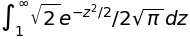

In [22]:
prob.rewrite(Integral) # 改写为积分表达式

In [23]:
prob.evaluate_integral() # 求解积分

### `Expectation`类用于实例化随机变量满足条件的期望表达式.

`E`可以看作是`Expectation`类实例化期望后求解积分的结果

In [24]:
from sympy.stats import Expectation, Normal, Probability
from sympy import symbols, Integral

In [25]:
mu = symbols("mu", positive=True)
sigma = symbols("sigma", positive=True)
Nor_x = Normal("Nor_x", mu, sigma)

In [26]:
Expectation(Nor_x)

In [27]:
Expectation(Nor_x).evaluate_integral().simplify()

我们也可以用`Probability`表达期望

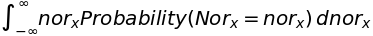

In [28]:
Expectation(Nor_x).rewrite(Probability)

我们也可以使用`doit()`接口将期望表达式展开

In [29]:
Nor_y = Normal("Nor_y", 0, 1)

In [30]:
Expectation(Nor_x+Nor_y).doit()

### `Variance`类用于实例化随机变量满足条件的方差表达式

`variance`可以看作是Variance类实例化期望后求解积分的结果

In [31]:
from sympy import symbols, Integral
from sympy.stats import Normal, Expectation, Variance, Probability
Variance(Nor_x)

In [32]:
Variance(Nor_x).evaluate_integral()

我们也可以用`Probability`表达方差

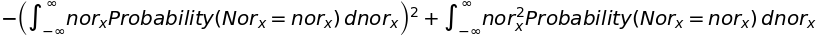

In [33]:
Variance(Nor_x).rewrite(Probability)

我们也可以用`𝐸𝑥𝑝𝑒𝑐𝑡𝑎𝑡𝑖𝑜𝑛`表达方差

In [34]:
Variance(Nor_x).rewrite(𝐸𝑥𝑝𝑒𝑐𝑡𝑎𝑡𝑖𝑜𝑛)

我们也可以使用`doit()`接口将方差表达式展开

In [35]:
Variance(Nor_x+Nor_y).doit()

### `Covariance`类用于实例化两个随机变量间的协方差表达式

`covariance`可以看作是Covariance类实例化期望后求解积分的结果

In [36]:
from sympy.stats import Covariance,covariance,𝐸𝑥𝑝𝑒𝑐𝑡𝑎𝑡𝑖𝑜𝑛
from sympy.stats import Normal
X = Normal("X", 3, 2)
Y = Normal("Y", 0, 1)
Z = Normal("Z", 0, 1)
W = Normal("W", 0, 1)

In [37]:
cexpr = Covariance(X, Y)
cexpr

In [38]:
cexpr.evaluate_integral()

In [39]:
covariance(X,Y)

我们可以用𝐸𝑥𝑝𝑒𝑐𝑡𝑎𝑡𝑖𝑜𝑛表达协方差

In [40]:
cexpr.rewrite(𝐸𝑥𝑝𝑒𝑐𝑡𝑎𝑡𝑖𝑜𝑛)

我们也可以使用`doit()`接口将协方差表达式展开

In [41]:
from sympy.abc import a, b,c,d

In [42]:
cexpr.doit()

In [43]:
Covariance(X, X).doit()

In [44]:
Covariance(a*X, b*X).doit()

In [45]:
Covariance(a*X + b*Y, c*Z + d*W).doit()

## 概率空间

SymPy中通常是用来验证某个表达式是否与另一表达式在同一个概率空间

In [46]:
from sympy.stats import pspace, Normal
from sympy.stats.rv import IndependentProductPSpace

In [47]:
X = Normal('X', 0, 1)
pspace(2*X + 1)

In [48]:
X.pspace

In [49]:
pspace(2*X + 1) == X.pspace

True